<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simulating-data-with-MIRAGE-+-Grizli" data-toc-modified-id="Simulating-data-with-MIRAGE-+-Grizli-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simulating data with MIRAGE + Grizli</a></span></li><li><span><a href="#Simple-catalog" data-toc-modified-id="Simple-catalog-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple catalog</a></span></li><li><span><a href="#YAML-generator" data-toc-modified-id="YAML-generator-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>YAML generator</a></span></li><li><span><a href="#Run-MIRAGE" data-toc-modified-id="Run-MIRAGE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Run MIRAGE</a></span></li><li><span><a href="#Make-drizzle-combined-image,-catalog,-etc." data-toc-modified-id="Make-drizzle-combined-image,-catalog,-etc.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Make drizzle combined image, catalog, etc.</a></span><ul class="toc-item"><li><span><a href="#Read-image-objects" data-toc-modified-id="Read-image-objects-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Read image objects</a></span></li><li><span><a href="#Run-Image2-on-direct-images,-AssignWCS-for-grism" data-toc-modified-id="Run-Image2-on-direct-images,-AssignWCS-for-grism-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Run Image2 on direct images, AssignWCS for grism</a></span></li><li><span><a href="#Update-FITS-headers-and-apply-GAIN-to-grisms" data-toc-modified-id="Update-FITS-headers-and-apply-GAIN-to-grisms-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Update FITS headers and apply GAIN to grisms</a></span></li></ul></li><li><span><a href="#Process-with-grizli" data-toc-modified-id="Process-with-grizli-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Process with grizli</a></span><ul class="toc-item"><li><span><a href="#Initialize-GroupFLT-object" data-toc-modified-id="Initialize-GroupFLT-object-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Initialize <code>GroupFLT</code> object</a></span></li><li><span><a href="#Grizli-trace-is-a-bit-offset-w.r.t.-MIRAGE-/-NIRCAM_Gsim" data-toc-modified-id="Grizli-trace-is-a-bit-offset-w.r.t.-MIRAGE-/-NIRCAM_Gsim-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Grizli trace is a bit offset w.r.t. MIRAGE / NIRCAM_Gsim</a></span><ul class="toc-item"><li><span><a href="#Now-it's-a-bit-better,-but-still-offset-in-trace-direction" data-toc-modified-id="Now-it's-a-bit-better,-but-still-offset-in-trace-direction-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Now it's a bit better, but still offset in trace direction</a></span></li></ul></li><li><span><a href="#1D-figure" data-toc-modified-id="1D-figure-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>1D figure</a></span></li><li><span><a href="#Reinit-for-full-grizli-sim" data-toc-modified-id="Reinit-for-full-grizli-sim-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Reinit for full grizli sim</a></span></li><li><span><a href="#Load-saved-&quot;beams&quot;-file" data-toc-modified-id="Load-saved-&quot;beams&quot;-file-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Load saved "beams" file</a></span></li><li><span><a href="#Now-the-2D-fit-is-perfect,-by-construction" data-toc-modified-id="Now-the-2D-fit-is-perfect,-by-construction-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Now the 2D fit is perfect, by construction</a></span></li><li><span><a href="#Compare-to-ETC" data-toc-modified-id="Compare-to-ETC-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Compare to ETC</a></span></li></ul></li><li><span><a href="#Simulate-spectra-with-FSPS-galaxy-model" data-toc-modified-id="Simulate-spectra-with-FSPS-galaxy-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Simulate spectra with FSPS galaxy model</a></span></li><li><span><a href="#Extended-Sersic-source" data-toc-modified-id="Extended-Sersic-source-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Extended Sersic source</a></span></li></ul></div>

# Simulating data with MIRAGE + Grizli

Generate full exposure simulation swith MIRAGE and then try to analyze them with Grizli.  

Also includes a comparision to the signal predicted by the etc using [pandeia](https://jwst-docs.stsci.edu/jwst-exposure-time-calculator-overview/jwst-etc-pandeia-engine-tutorial/installing-pandeia#InstallingPandeia-DataFiles).


In [1]:
import os
import glob
import yaml

import matplotlib.pyplot as plt
import numpy as np

import astropy.io.fits as pyfits

import jwst    
# Path to pipeline config files
JWST_PIPELINE = os.path.dirname(jwst.__file__) + '/pipeline/'

import grizli
import grizli.jwst
from grizli import utils
utils.set_warnings()

import pandeia.engine as etc

os.chdir('/Users/gbrammer/Research/JWST/NIRISS-Simulation')

In [2]:
# NIRISS config files for GRIZLI, based on 
# https://github.com/npirzkal/GRISM_NIRISS
# https://github.com/npirzkal/GRISM_NIRCAM
cwd = os.getcwd()
if not os.path.exists(os.path.join(grizli.GRIZLI_PATH, 'CONF/GR150R.F200W.conf')):
    print('Fetch Grizli config files for JWST')
    os.chdir(os.path.join(grizli.GRIZLI_PATH, 'CONF'))
    os.system('wget https://s3.amazonaws.com/grizli-v1/JWSTGrism/jwst-grism-conf.tar.gz')
    if not os.path.exists('jwst-grism-conf.tar.gz'):
        raise ValueError('Couldn\'t download jwst-grism-conf.tar.gz!')
    
    os.system('tar xzf jwst-grism-conf.tar.gz')
    os.chdir(cwd)
    

In [2]:
import mirage
print('JWST pipeline version: ', jwst.__version__)
print('MIRAGE version: ', mirage.__version__)
print('PANDEIA etc version: ', etc.__version__)
print('Grizli version: ', grizli.__version__)

# APT version
import xml
_xml = xml.dom.minidom.parse('niriss_basic.xml')
prop = _xml.childNodes[3]
print('APT version: ', prop.getAttribute('APTVersion'))


JWST pipeline version:  0.16.2
MIRAGE version:  1.3.3
PANDEIA etc version:  1.5.2
Grizli version:  1.2dev1641
APT version:  Version 2020.4  


In [3]:
# Initial download
if False:
    from mirage.reference_files import downloader

    download_path = '/Users/gbrammer/Research/JWST/NIRISS-Simulation/MIRAGE_DATA'

    downloader.download_reffiles(download_path, instrument='niriss', dark_type='raw', 
                                 skip_darks=False, skip_cosmic_rays=False, skip_psfs=False, skip_grism=False)


# Simple catalog

Single point source

In [4]:
#########
# Catalog
import numpy as np
from mirage.catalogs import catalog_generator

ra_list, dec_list = [53.1681293],  [-27.7915976]
nis_f115w_mag = [22]
nis_f150w_mag = [22]
nis_f200w_mag = [22]

ptsrc = catalog_generator.PointSourceCatalog(ra=ra_list, dec=dec_list)
ptsrc.add_magnitude_column(nis_f115w_mag, instrument='niriss', filter_name='F115W', magnitude_system='abmag')
ptsrc.add_magnitude_column(nis_f150w_mag, instrument='niriss', filter_name='F150W', magnitude_system='abmag')
ptsrc.add_magnitude_column(nis_f200w_mag, instrument='niriss', filter_name='F200W', magnitude_system='abmag')
ptsrc.save('point_sources.cat')

ptsrc.table.write('point_sources.cat.fits', overwrite=True)

# YAML generator

- Target generated from "HUDF"
- Generic APT file with 4-point LARGE pattern in NIRISS ``F115W``, ``F150W``, ``F200W`` filters and ``BOTH`` grisms.
- ``NIS`` readout
- ``NGROUP=8`` (343 s) for direct images
- ``NGROUP=10`` (429 s) for grism images, total ~ 1 hr across both grisms


In [5]:
import yaml
from mirage.yaml import yaml_generator

crs = None

dates = '2022-11-1'

roll_angle = None
catalogs = 'point_sources.cat'

catalogs = {'point_source': 'point_sources.cat'}

background = 'medium'

minimum_signal = 0.01
minimum_signal_units = 'MJy/sr'

xml_file = "niriss_basic.xml"
pointing_file = "niriss_basic.pointing"

reffile_overrides=None
pav3 = roll_angle

yam = yaml_generator.SimInput(xml_file, pointing_file, catalogs=catalogs, verbose=True,
                              output_dir='./yaml_files/',
                              simdata_output_dir='./NirissMirage_v1',
                              cosmic_rays=crs, background=background, roll_angle=pav3,
                              dates=dates, datatype='raw', dateobs_for_background=False,
                              reffile_defaults='crds', reffile_overrides=reffile_overrides)
                              
yam.use_linearized_darks = False
yam.datatype = 'raw'
#yam.make_output_names()
yam.create_inputs()


target_info:
{'NAME-HUBBLE-ULTRA-DEEP-FIELD': ('03:32:39.0000', '-27:47:29.00')}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Observation `001` labelled `None` uses template `NirissWfss`
APTObservationParams Dictionary holds 0 entries before reading template
Reading NIRISS WFSS template
Dictionary read from template has 15 entries.
Found 1 tile(s) for observation 001 Observation 1
Found 1 visits with numbers: [1]
APTObservationParams Dictionary holds 15 entries after reading template (+15 entries)
Finished reading APT xml file.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Number of entries before expanding dithers: 15
Number of entries after expanding dithers:  36
Expanded table for Observation 001 has 36 entries

Wrote 1 observations and 36 entries to /Users/gbrammer/Research/JWST/NIRISS-Simulation/yaml_files/observation_list.yaml
csv exposure list written to /Users/gbrammer

# Run MIRAGE

In [6]:
from mirage.imaging_simulator import ImgSim
from mirage.wfss_simulator import WFSSSim
    
yaml_files = glob.glob('yaml_files/jw*.yaml')
yaml_files.sort()
for file in yaml_files:
    #print('\n'.join(yaml_files))
    with open(file) as fp:
        yy = yaml.load(fp, Loader=yaml.Loader)
        print(file, yy['Inst']['instrument'], yy['Inst']['mode'], 
              yy['Readout']['filter'], yy['Readout']['pupil'], 
              yy['Readout']['filter'], yy['Readout']['ngroup'])

yaml_files/jw00042001001_01101_00001_nis.yaml NIRISS imaging CLEAR F115W CLEAR 8
yaml_files/jw00042001001_01101_00002_nis.yaml NIRISS wfss GRISM150R F115W GRISM150R 10
yaml_files/jw00042001001_01101_00003_nis.yaml NIRISS wfss GRISM150R F115W GRISM150R 10
yaml_files/jw00042001001_01101_00004_nis.yaml NIRISS wfss GRISM150R F115W GRISM150R 10
yaml_files/jw00042001001_01101_00005_nis.yaml NIRISS wfss GRISM150R F115W GRISM150R 10
yaml_files/jw00042001001_01101_00006_nis.yaml NIRISS imaging CLEAR F115W CLEAR 8
yaml_files/jw00042001001_01101_00007_nis.yaml NIRISS imaging CLEAR F115W CLEAR 8
yaml_files/jw00042001001_01101_00008_nis.yaml NIRISS wfss GRISM150C F115W GRISM150C 10
yaml_files/jw00042001001_01101_00009_nis.yaml NIRISS wfss GRISM150C F115W GRISM150C 10
yaml_files/jw00042001001_01101_00010_nis.yaml NIRISS wfss GRISM150C F115W GRISM150C 10
yaml_files/jw00042001001_01101_00011_nis.yaml NIRISS wfss GRISM150C F115W GRISM150C 10
yaml_files/jw00042001001_01101_00012_nis.yaml NIRISS imaging 

In [7]:
# Fix to grism definitions that have wrong grism name for the pipline, 
# probably from a version mismatch between APT / MIRAGE
os.system('perl -pi -e "s/GRISM150/GR150/" yaml_files/*yaml')

0

In [8]:
def make_rate_image(uncal_file):  
    """
    Make a count-rate image from the MIRAGE uncal outputs

    Runs Detector1Pipeline with default paraameters on the 
    """
    from jwst.datamodels import ImageModel
    from jwst.pipeline import Detector1Pipeline, Image2Pipeline, Spec2Pipeline

    
    ############
    # Run Detector1
    steps_det1 = Detector1Pipeline.from_config_file(config_file=JWST_PIPELINE+'calwebb_detector1.cfg')
    det1 = steps_det1.run(uncal_file)
    
    # Image2 for getting flat calib file
    steps_image2 = Image2Pipeline.from_config_file(config_file=JWST_PIPELINE+'calwebb_image2.cfg')

    # Divide out flat
    flat_file = steps_image2.flat_field.get_reference_file(det1, 'flat')
    flat_im = pyfits.open(flat_file)
    det1.data /= flat_im['SCI'].data**2

    # DQ mask from mask ref file, since seems to be garbled in MIRAGE output with overflow ints
    mask_file = steps_det1.dq_init.get_reference_file(det1, 'mask')
    mask_im = pyfits.open(mask_file)
    mask_dq = (mask_im['DQ'].data & 1)
    mask_dq |= (~np.isfinite(det1.data) | (flat_im['SCI'].data < 0.7))*2 
    mask_dq |= (det1.err == 0)*4
    
    det1.dq = mask_dq
    det1.data[mask_dq > 0] = 0
    
    # Grism background
    if ('GR' in det1.meta.instrument.filter) & (not hasattr(det1.meta.exposure, 'gsky001')):
        
        grism_bkg_file = os.getenv('MIRAGE_DATA')+'/niriss/GRISM_NIRISS/{pupil}_{filter}_medium_background.fits'
        
        meta = det1.meta.instrument
        grism_bkg_file = grism_bkg_file.format(pupil=meta.pupil.lower(), filter=meta.filter.lower())
        grism_bkg = pyfits.open(grism_bkg_file)[0].data / flat_im['SCI'].data
                
        _A = np.array(np.array([grism_bkg]))
        _Ax = np.array(np.array([(grism_bkg/det1.err)]))
        
        _y = (det1.data  / det1.err)
        
        msk = (det1.dq == 0) & (np.isfinite(_y))
        
        sky_level = np.linalg.lstsq(_Ax[:,msk].T, _y[msk], rcond=-1)
        sky_model = grism_bkg * sky_level[0][0]
        
        # 1/f noise along columns
        data = (det1.data - sky_model)*(mask_dq == 0)
        data[~np.isfinite(data)] = 0
        ma = np.ma.masked_array(data, mask=data == 0)
        
        cols = np.ma.median(ma, axis=0)
        
        cleaned = data - cols.filled(0)
        det1.data = cleaned
        det1.dq |= (data == 0).astype(np.uint32)
        
        det1.meta.exposure.gsky001 = sky_level[0][0]
        
        # Force FWPOS = FWCPOS ref
        if det1.meta.instrument.filter == 'GR150R':
            det1.meta.instrument.filter_position = 33.65510941
        else:
            det1.meta.instrument.filter_position = 354.222229
        
    det1.write(uncal_file.replace('_uncal.fits','_rate.fits'), overwrite=True)


In [9]:
import yaml

yaml_files = glob.glob('yaml_files/jw*.yaml')
yaml_files.sort()

for yfile in yaml_files:
    with open(yfile) as fp:
        yy = yaml.load(fp, Loader=yaml.Loader)
    
    uncal_file = os.path.join(yy['Output']['directory'], yy['Output']['file'])
    if os.path.exists(uncal_file):
        print(f'Found {uncal_file}')
    else:    
        mode = yy['Inst']['mode']
        print(mode)
        if mode == 'imaging':
            im = ImgSim()
            im.paramfile = yfile
            im.create()
        else:
            im = WFSSSim(yfile)
            im.create()
    
    # Remove some intermediate products 
    files = glob.glob(yy['Output']['directory']+'/*linear*')
    for file in files:
        if os.path.exists(file):
            os.remove(file)
    
    rate_file = uncal_file.replace('_uncal.fits','_rate.fits')
    if os.path.exists(rate_file):
        print(f'Found {rate_file}')
    else:
        make_rate_image(uncal_file)

Found /Users/gbrammer/Research/JWST/NIRISS-Simulation/NirissMirage_v1/jw00042001001_01101_00001_nis_uncal.fits
Found /Users/gbrammer/Research/JWST/NIRISS-Simulation/NirissMirage_v1/jw00042001001_01101_00001_nis_rate.fits
Found /Users/gbrammer/Research/JWST/NIRISS-Simulation/NirissMirage_v1/jw00042001001_01101_00002_nis_uncal.fits
Found /Users/gbrammer/Research/JWST/NIRISS-Simulation/NirissMirage_v1/jw00042001001_01101_00002_nis_rate.fits
Found /Users/gbrammer/Research/JWST/NIRISS-Simulation/NirissMirage_v1/jw00042001001_01101_00003_nis_uncal.fits
Found /Users/gbrammer/Research/JWST/NIRISS-Simulation/NirissMirage_v1/jw00042001001_01101_00003_nis_rate.fits
Found /Users/gbrammer/Research/JWST/NIRISS-Simulation/NirissMirage_v1/jw00042001001_01101_00004_nis_uncal.fits
Found /Users/gbrammer/Research/JWST/NIRISS-Simulation/NirissMirage_v1/jw00042001001_01101_00004_nis_rate.fits
Found /Users/gbrammer/Research/JWST/NIRISS-Simulation/NirissMirage_v1/jw00042001001_01101_00005_nis_uncal.fits
Found

# Make drizzle combined image, catalog, etc.

In [10]:
from jwst.resample import resample_step
from jwst.datamodels import ModelContainer, ImageModel
from jwst.pipeline import Detector1Pipeline, Image2Pipeline, Spec2Pipeline

## Read image objects

In [11]:
image_objects = {}
rate_files = glob.glob('NirissMirage_v1/*rate.fits')
rate_files.sort()

for file in rate_files[:]:
    img = ImageModel(file)
    pupil = img.meta.instrument.pupil
    filt = img.meta.instrument.filter
    print(f'Read {file} ({pupil}, {filt})')
    
    if pupil not in image_objects:
        image_objects[pupil] = {}
    
    if filt not in image_objects[pupil]:
        image_objects[pupil][filt] = []
    
    image_objects[pupil][filt].append(img)

Read NirissMirage_v1/jw00042001001_01101_00001_nis_rate.fits (F115W, CLEAR)
Read NirissMirage_v1/jw00042001001_01101_00002_nis_rate.fits (F115W, GR150R)
Read NirissMirage_v1/jw00042001001_01101_00003_nis_rate.fits (F115W, GR150R)
Read NirissMirage_v1/jw00042001001_01101_00004_nis_rate.fits (F115W, GR150R)
Read NirissMirage_v1/jw00042001001_01101_00005_nis_rate.fits (F115W, GR150R)
Read NirissMirage_v1/jw00042001001_01101_00006_nis_rate.fits (F115W, CLEAR)
Read NirissMirage_v1/jw00042001001_01101_00007_nis_rate.fits (F115W, CLEAR)
Read NirissMirage_v1/jw00042001001_01101_00008_nis_rate.fits (F115W, GR150C)
Read NirissMirage_v1/jw00042001001_01101_00009_nis_rate.fits (F115W, GR150C)
Read NirissMirage_v1/jw00042001001_01101_00010_nis_rate.fits (F115W, GR150C)
Read NirissMirage_v1/jw00042001001_01101_00011_nis_rate.fits (F115W, GR150C)
Read NirissMirage_v1/jw00042001001_01101_00012_nis_rate.fits (F115W, CLEAR)
Read NirissMirage_v1/jw00042001001_01101_00013_nis_rate.fits (F150W, CLEAR)
Read

In [14]:
import eazy

# github.com/gbrammer/eazypy

# For NIRISS filter bandpass
if not os.path.exists('FILTER.RES.latest'):
    eazy.symlink_eazy_inputs()

res = eazy.filters.FilterFile()

## Run Image2 on direct images, AssignWCS for grism

Add HST-like photomety keywords, like "PHOTFLAM", "PHOTFNU" needed by ``grizli`` (for now).

In [15]:
from jwst.assign_wcs import AssignWcsStep
from grizli import prep

calib = {}
for pupil in image_objects:
    calib[pupil] = []
    for filt in image_objects[pupil]:
        for i, file in enumerate(image_objects[pupil][filt]):
            if filt == 'CLEAR':
                steps_image2 = Image2Pipeline.from_config_file(config_file=JWST_PIPELINE+'calwebb_image2.cfg')
                _cal = steps_image2.run(file)[0]
                calib[pupil].append(_cal)
                            
            if not hasattr(file.meta, 'wcs'):
                step = AssignWcsStep()
                prod = step.run(file)
                image_objects[pupil][filt][i] = prod

    photfnu = 1./calib[pupil][0].meta.photometry.conversion_microjanskys*1.e-6
    
    # Filter pivot wave from eazy filter bandpass
    ix = res.search(f'niriss_{pupil.lower()}')[0]
    bp = res[ix+1]
    photplam = bp.pivot
    photflam = photfnu*1.e6*1.e-29*3.e18/photplam**2

    for i, file in enumerate(image_objects[pupil]['CLEAR']):
     
        msk = file.dq == 0
        mdrizsky = np.median(file.data[msk])
        print(mdrizsky)
        file.data -= msk*mdrizsky
        file.meta.photometry.mdrizky = mdrizsky
        file.meta.photometry.photplam = photplam
        file.meta.photometry.photfnu = photfnu
        file.meta.photometry.photflam = photflam
    
    mexp = ModelContainer()
    mexp.extend(image_objects[pupil]['CLEAR'])
    
    print(pupil, photfnu)
    
    step = resample_step.ResampleStep()
    step.pixfrac = 0.6
    drz = step.process(mexp)
    
    to_ujy = photfnu*1.e6
    
#     cat, seg = prep.make_SEP_catalog_from_arrays(drz.data*to_ujy, 1/np.sqrt(drz.wht)*to_ujy, 
#                                                  drz.wht == 0, get_background=True, segmentation_map=True, 
#                                                  threshold=20, wcs=drz.wcs, ZP=23.9)
    
    _head = utils.to_header(drz.wcs)
    for i in [1,2]:
        for j in [1,2]:
            _head[f'CD{i}_{j}'] *= _head[f'CDELT{i}']
    
        _head[f'CDELT{i}'] = 1
        
    _head['PHOTFLAM'] = photflam
    _head['PHOTPLAM'] = photplam
    _head['PHOTFNU'] = photfnu
    _head['PUPIL'] = pupil
    _head['FILTER'] = 'CLEAR'
    _head['INSTRUME'] = 'NIRISS'
    _head['DETECTOR'] = 'NIS'
    
    pyfits.writeto(f'niriss-{pupil.lower()}_drz_sci.fits', data=drz.data, header=_head, overwrite=True)
    pyfits.writeto(f'niriss-{pupil.lower()}_drz_wht.fits', data=drz.wht, header=_head, overwrite=True)

    cat = prep.make_SEP_catalog(f'niriss-{pupil.lower()}', threshold=18, compute_auto_quantities=False,
                                get_background=True, column_case=str.lower)
    cat['id'] = cat['number']
    cat.write(f'niriss-{pupil.lower()}.cat.fits', overwrite=True)

    #pyfits.writeto(f'niriss-{pupil.lower()}_seg.fits', data=seg, header=_head, overwrite=True)
    



2020-10-05 15:57:07,657 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2020-10-05 15:57:07,660 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2020-10-05 15:57:07,662 - stpipe.Image2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2020-10-05 15:57:07,664 - stpipe.Image2Pipeline.flat_field - INFO - FlatFieldStep instance created.
2020-10-05 15:57:07,667 - stpipe.Image2Pipeline.photom - INFO - PhotomStep instance created.
2020-10-05 15:57:07,669 - stpipe.Image2Pipeline.resample - INFO - ResampleStep instance created.
2020-10-05 15:57:07,747 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline running with args (<ImageModel(2048, 2048) from jw00042001001_01101_00001_nis_rate.fits>,).
2020-10-05 15:57:07,754 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 's

2020-10-05 15:57:15,209 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2020-10-05 15:57:15,210 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2020-10-05 15:57:15,212 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf'.
2020-10-05 15:57:15,214 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_drizpars_0002.fits'.
2020-10-05 15:57:15,215 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2020-10-05 15:57:15,217 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is 'N/A'.
2020-10-05 15:57:15,218 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_flat_0193.fits'

2020-10-05 15:57:20,737 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183438924 -27.810302975 53.183896094 -27.772862257 53.141852295 -27.772621127 53.141394658 -27.810092476
2020-10-05 15:57:20,738 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2020-10-05 15:57:20,743 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2020-10-05 15:57:20,913 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(2048, 2048) from jw00042001001_01101_00007_nis_rate.fits>,).
2020-10-05 15:57:20,916 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False}
2020-10-05 15:57:21,231 - stpipe.Image2P

2020-10-05 15:57:26,710 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits
2020-10-05 15:57:26,801 - stpipe.Image2Pipeline.photom - INFO - Using instrument: NIRISS
2020-10-05 15:57:26,803 - stpipe.Image2Pipeline.photom - INFO -  detector: NIS
2020-10-05 15:57:26,804 - stpipe.Image2Pipeline.photom - INFO -  exp_type: NIS_IMAGE
2020-10-05 15:57:26,805 - stpipe.Image2Pipeline.photom - INFO -  filter: CLEAR
2020-10-05 15:57:26,806 - stpipe.Image2Pipeline.photom - INFO -  pupil: F115W
2020-10-05 15:57:26,839 - stpipe.Image2Pipeline.photom - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/util.py:174: NoTypeWarning: model_type not found. Opening /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as a ReferenceImageModel
  NoTypeWarning)

2020-10-05 15:57:26,841 - stpipe.Image2Pipeline.photom - INFO 

  351 jwst_niriss_f115w v20160902163017 lambda_c= 1.1496e+04
0.8866118
0.88658834
0.886608
0.886585
F115W 1.2889440666535974e-07


2020-10-05 15:57:37,631 - stpipe.ResampleStep - INFO - ResampleStep instance created.
2020-10-05 15:57:37,637 - stpipe.ResampleStep - INFO - Drizpars reference file: /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_drizpars_0002.fits
2020-10-05 15:57:37,757 - stpipe - INFO - Blending metadata for None
2020-10-05 15:57:40,184 - stpipe - INFO - Drizzling (2048, 2048) --> (2084, 2056)
2020-10-05 15:57:43,125 - stpipe - INFO - Drizzling (2048, 2048) --> (2084, 2056)
2020-10-05 15:57:46,143 - stpipe - INFO - Drizzling (2048, 2048) --> (2084, 2056)
2020-10-05 15:57:49,083 - stpipe - INFO - Drizzling (2048, 2048) --> (2084, 2056)
2020-10-05 15:57:50,353 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183453235 -27.810776125 53.183905058 -27.772779886 53.141538995 -27.772379159 53.141072363 -27.810375258
2020-10-05 15:57:50,555 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:1003: VerifyWarning: 

make_SEP_catalog: sep version = 1.10.0
# (Mon Oct  5 15:57:50 2020)
sep: Image AB zeropoint =  26.124


2020-10-05 15:57:50,794 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/wcs/wcs.py:687: FITSFixedWarning: 'datfix' made the change 'Set DATE-REF to '1858-11-17' from MJD-REF'.
  FITSFixedWarning)



# (Mon Oct  5 15:57:50 2020)
SEP: Get background {'bw': 32.0, 'bh': 32.0, 'fw': 3, 'fh': 3}
SEP: err_scale=0.690
   SEP: Extract...
    Done.


2020-10-05 15:57:51,717 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:267: VerifyWarning: Keyword name 'FILTER_TYPE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  keyword), VerifyWarning)

2020-10-05 15:57:51,719 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:267: VerifyWarning: Keyword name 'THRESHOLD' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  keyword), VerifyWarning)

2020-10-05 15:57:51,721 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:267: VerifyWarning: Keyword name 'ERR_SCALE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  keyword), VerifyWarning)



# SEP niriss-f115w.cat.fits: 54 objects


2020-10-05 15:57:51,871 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/ipykernel_launcher.py:72: ResourceWarning: unclosed file <_io.FileIO name='niriss-f115w_drz_sci.fits' mode='rb' closefd=True>

2020-10-05 15:57:51,879 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/ipykernel_launcher.py:72: ResourceWarning: unclosed file <_io.FileIO name='niriss-f115w.cat.fits' mode='rb+' closefd=True>

2020-10-05 15:57:51,960 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2020-10-05 15:57:51,962 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2020-10-05 15:57:51,965 - stpipe.Image2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2020-10-05 15:57:51,967 - stpipe.Image2Pipeline.flat_field - INFO - FlatFieldStep instance created.
2020-10-05 15:57:51,969 - stpipe.Image2Pipeline.photom - INFO - PhotomStep instance created.
2020-10-05 15:57:51,971 - stpipe.Image2

2020-10-05 15:57:57,925 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits'.
2020-10-05 15:57:57,927 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2020-10-05 15:57:57,928 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2020-10-05 15:57:57,930 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2020-10-05 15:57:57,931 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2020-10-05 15:57:57,933 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf'.
2020-10-05 15:57:57,934 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_drizpars_0002.fits'.

2020-10-05 15:58:03,688 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2020-10-05 15:58:03,903 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  53.184538585 -27.810226759 53.184995754 -27.772786041 53.142951985 -27.772544911 53.142494349 -27.810016260
2020-10-05 15:58:03,905 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.184538585 -27.810226759 53.184995754 -27.772786041 53.142951985 -27.772544911 53.142494349 -27.810016260
2020-10-05 15:58:03,906 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2020-10-05 15:58:03,911 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs don

2020-10-05 15:58:10,712 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits
2020-10-05 15:58:10,808 - stpipe.Image2Pipeline.photom - INFO - Using instrument: NIRISS
2020-10-05 15:58:10,809 - stpipe.Image2Pipeline.photom - INFO -  detector: NIS
2020-10-05 15:58:10,811 - stpipe.Image2Pipeline.photom - INFO -  exp_type: NIS_IMAGE
2020-10-05 15:58:10,812 - stpipe.Image2Pipeline.photom - INFO -  filter: CLEAR
2020-10-05 15:58:10,814 - stpipe.Image2Pipeline.photom - INFO -  pupil: F150W
2020-10-05 15:58:10,850 - stpipe.Image2Pipeline.photom - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/util.py:174: NoTypeWarning: model_type not found. Opening /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as a ReferenceImageModel
  NoTypeWarning)

2020-10-05 15:58:10,852 - stpipe.Image2Pipeline.photom - INFO 

  352 jwst_niriss_f150w v20160902163017 lambda_c= 1.4935e+04
0.6476732
0.6477624
0.64772713
0.64772457
F150W 1.1474229692848124e-07


2020-10-05 15:58:22,323 - stpipe.ResampleStep - INFO - ResampleStep instance created.
2020-10-05 15:58:22,328 - stpipe.ResampleStep - INFO - Drizpars reference file: /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_drizpars_0002.fits
2020-10-05 15:58:22,459 - stpipe - INFO - Blending metadata for None
2020-10-05 15:58:24,837 - stpipe - INFO - Drizzling (2048, 2048) --> (2141, 2109)
2020-10-05 15:58:27,785 - stpipe - INFO - Drizzling (2048, 2048) --> (2141, 2109)
2020-10-05 15:58:30,844 - stpipe - INFO - Drizzling (2048, 2048) --> (2141, 2109)
2020-10-05 15:58:33,784 - stpipe - INFO - Drizzling (2048, 2048) --> (2141, 2109)
2020-10-05 15:58:35,054 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.184539676 -27.811821139 53.185003663 -27.772785654 53.141545479 -27.772374598 53.141065885 -27.811409936
2020-10-05 15:58:35,263 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:1003: VerifyWarning: 

make_SEP_catalog: sep version = 1.10.0
# (Mon Oct  5 15:58:35 2020)
sep: Image AB zeropoint =  26.251


2020-10-05 15:58:35,475 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/wcs/wcs.py:687: FITSFixedWarning: 'datfix' made the change 'Set DATE-REF to '1858-11-17' from MJD-REF'.
  FITSFixedWarning)



# (Mon Oct  5 15:58:35 2020)
SEP: Get background {'bw': 32.0, 'bh': 32.0, 'fw': 3, 'fh': 3}
SEP: err_scale=0.613
   SEP: Extract...
    Done.


2020-10-05 15:58:36,469 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:267: VerifyWarning: Keyword name 'FILTER_TYPE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  keyword), VerifyWarning)

2020-10-05 15:58:36,471 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:267: VerifyWarning: Keyword name 'THRESHOLD' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  keyword), VerifyWarning)

2020-10-05 15:58:36,473 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:267: VerifyWarning: Keyword name 'ERR_SCALE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  keyword), VerifyWarning)



# SEP niriss-f150w.cat.fits: 28 objects


2020-10-05 15:58:36,537 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/ipykernel_launcher.py:72: ResourceWarning: unclosed file <_io.FileIO name='niriss-f150w_drz_sci.fits' mode='rb' closefd=True>

2020-10-05 15:58:36,546 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/ipykernel_launcher.py:72: ResourceWarning: unclosed file <_io.FileIO name='niriss-f150w.cat.fits' mode='rb+' closefd=True>

2020-10-05 15:58:36,645 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2020-10-05 15:58:36,648 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2020-10-05 15:58:36,650 - stpipe.Image2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2020-10-05 15:58:36,651 - stpipe.Image2Pipeline.flat_field - INFO - FlatFieldStep instance created.
2020-10-05 15:58:36,653 - stpipe.Image2Pipeline.photom - INFO - PhotomStep instance created.
2020-10-05 15:58:36,656 - stpipe.Image2

2020-10-05 15:58:42,783 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits'.
2020-10-05 15:58:42,784 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2020-10-05 15:58:42,786 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2020-10-05 15:58:42,787 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2020-10-05 15:58:42,789 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2020-10-05 15:58:42,790 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf'.
2020-10-05 15:58:42,791 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_drizpars_0002.fits'.

2020-10-05 15:58:48,885 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2020-10-05 15:58:49,092 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  53.186386755 -27.810236336 53.186843924 -27.772795618 53.144800152 -27.772554488 53.144342515 -27.810025836
2020-10-05 15:58:49,094 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.186386755 -27.810236336 53.186843924 -27.772795618 53.144800152 -27.772554488 53.144342515 -27.810025836
2020-10-05 15:58:49,095 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2020-10-05 15:58:49,099 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs don

2020-10-05 15:58:56,014 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits
2020-10-05 15:58:56,106 - stpipe.Image2Pipeline.photom - INFO - Using instrument: NIRISS
2020-10-05 15:58:56,107 - stpipe.Image2Pipeline.photom - INFO -  detector: NIS
2020-10-05 15:58:56,108 - stpipe.Image2Pipeline.photom - INFO -  exp_type: NIS_IMAGE
2020-10-05 15:58:56,109 - stpipe.Image2Pipeline.photom - INFO -  filter: CLEAR
2020-10-05 15:58:56,111 - stpipe.Image2Pipeline.photom - INFO -  pupil: F200W
2020-10-05 15:58:56,143 - stpipe.Image2Pipeline.photom - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/jwst/datamodels/util.py:174: NoTypeWarning: model_type not found. Opening /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as a ReferenceImageModel
  NoTypeWarning)

2020-10-05 15:58:56,145 - stpipe.Image2Pipeline.photom - INFO 

  353 jwst_niriss_f200w v20160902163017 lambda_c= 1.9930e+04
0.53477156
0.53474206
0.5347862
0.5348083
F200W 1.2411568868749718e-07


2020-10-05 15:59:07,891 - stpipe.ResampleStep - INFO - ResampleStep instance created.
2020-10-05 15:59:07,896 - stpipe.ResampleStep - INFO - Drizpars reference file: /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_drizpars_0002.fits
2020-10-05 15:59:08,022 - stpipe - INFO - Blending metadata for None
2020-10-05 15:59:10,428 - stpipe - INFO - Drizzling (2048, 2048) --> (2232, 2199)
2020-10-05 15:59:13,638 - stpipe - INFO - Drizzling (2048, 2048) --> (2232, 2199)
2020-10-05 15:59:16,569 - stpipe - INFO - Drizzling (2048, 2048) --> (2232, 2199)
2020-10-05 15:59:19,559 - stpipe - INFO - Drizzling (2048, 2048) --> (2232, 2199)
2020-10-05 15:59:20,851 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.186368437 -27.813485552 53.186851805 -27.772790919 53.141539077 -27.772362323 53.141038744 -27.813056795
2020-10-05 15:59:21,072 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:1003: VerifyWarning: 

make_SEP_catalog: sep version = 1.10.0
# (Mon Oct  5 15:59:21 2020)
sep: Image AB zeropoint =  26.165


2020-10-05 15:59:21,304 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/wcs/wcs.py:687: FITSFixedWarning: 'datfix' made the change 'Set DATE-REF to '1858-11-17' from MJD-REF'.
  FITSFixedWarning)



# (Mon Oct  5 15:59:21 2020)
SEP: Get background {'bw': 32.0, 'bh': 32.0, 'fw': 3, 'fh': 3}
SEP: err_scale=0.574
   SEP: Extract...
    Done.


2020-10-05 15:59:22,388 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:267: VerifyWarning: Keyword name 'FILTER_TYPE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  keyword), VerifyWarning)

2020-10-05 15:59:22,390 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:267: VerifyWarning: Keyword name 'THRESHOLD' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  keyword), VerifyWarning)

2020-10-05 15:59:22,393 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/io/fits/card.py:267: VerifyWarning: Keyword name 'ERR_SCALE' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  keyword), VerifyWarning)



# SEP niriss-f200w.cat.fits: 46 objects


2020-10-05 15:59:22,466 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/ipykernel_launcher.py:72: ResourceWarning: unclosed file <_io.FileIO name='niriss-f200w_drz_sci.fits' mode='rb' closefd=True>

2020-10-05 15:59:22,476 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/ipykernel_launcher.py:72: ResourceWarning: unclosed file <_io.FileIO name='niriss-f200w.cat.fits' mode='rb+' closefd=True>



## Update FITS headers and apply GAIN to grisms

The grism sensitivity curves are provided in units ``FLAM_CGS / (electrons per second)``, so need to multiply the 
grism ``rate`` images (``BUNIT = DN/s``) by the gain.

In [17]:
steps_det1 = Detector1Pipeline.from_config_file(config_file=JWST_PIPELINE + 'calwebb_detector1.cfg')

file_objects = {}
for pupil in image_objects:
    if pupil not in file_objects:
        file_objects[pupil] = {}
    
    dobj = image_objects[pupil]['CLEAR'][0]
    
    for filt in image_objects[pupil]:
        if filt not in file_objects[pupil]:
            file_objects[pupil][filt] = []
        
        for obj in image_objects[pupil][filt]:
            _file = 'NirissMirage_v1/'+obj.meta.filename
            
            print(obj, pupil, filt)
                  
            im = pyfits.open(_file, mode='update')
            im[0].header['PHOTPLAM'] = dobj.meta.photometry.photplam
            im[0].header['PHOTFLAM'] = dobj.meta.photometry.photflam
            im[0].header['PHOTFNU'] = dobj.meta.photometry.photfnu
            im.flush()
            
            im.close()
            
            if filt.startswith('GR'):
                # Scale by GAIN image since grism sensitivity calibrated in 
                # f_lambda / (elec / s)
                gain_file = steps_det1.gain_scale.get_reference_file(obj, 'gain')
                print(f'   >> Apply gain from {gain_file}')
                gain_im = pyfits.open(gain_file)
                
                im = pyfits.open(_file)

                im['SCI'].data *= gain_im['SCI'].data
                im['SCI'].header['BUNIT'] = 'ELECTRONS/s'
                
                im['ERR'].data *= gain_im['SCI'].data
                im['ERR'].header['BUNIT'] = 'ELECTRONS/s'
                
                _efile = _file.replace('_rate.fits', '_elec.fits')
                im.writeto(_efile, overwrite=True)
                file_objects[pupil][filt].append(_efile)
                
                gain_im.close()
                im.close()

            else:
                file_objects[pupil][filt].append(_file)



2020-10-05 15:59:22,614 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2020-10-05 15:59:22,616 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2020-10-05 15:59:22,618 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2020-10-05 15:59:22,620 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2020-10-05 15:59:22,622 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2020-10-05 15:59:22,624 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2020-10-05 15:59:22,626 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2020-10-05 15:59:22,628 - stpipe.Detector1Pipeline.rscd - INFO - RSCD_Step instance created.
2020-10-05 15:59:22,630 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2020-10-05 15:59:22,632 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2020-10-05 

<ImageModel(2048, 2048) from jw00042001001_01101_00001_nis_rate.fits> F115W CLEAR
<ImageModel(2048, 2048) from jw00042001001_01101_00006_nis_rate.fits> F115W CLEAR
<ImageModel(2048, 2048) from jw00042001001_01101_00007_nis_rate.fits> F115W CLEAR
<ImageModel(2048, 2048) from jw00042001001_01101_00012_nis_rate.fits> F115W CLEAR
<ImageModel(2048, 2048) from jw00042001001_01101_00002_nis_rate.fits> F115W GR150R
   >> Apply gain from /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits
<ImageModel(2048, 2048) from jw00042001001_01101_00003_nis_rate.fits> F115W GR150R
   >> Apply gain from /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits
<ImageModel(2048, 2048) from jw00042001001_01101_00004_nis_rate.fits> F115W GR150R
   >> Apply gain from /Users/gbrammer/Research/grizli/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits
<ImageModel(2048, 2048) from jw00042001001_01101_00005_nis_rate.fits> F115W GR

In [18]:
print(yaml.dump(file_objects, Dumper=yaml.SafeDumper))

F115W:
  CLEAR:
  - NirissMirage_v1/jw00042001001_01101_00001_nis_rate.fits
  - NirissMirage_v1/jw00042001001_01101_00006_nis_rate.fits
  - NirissMirage_v1/jw00042001001_01101_00007_nis_rate.fits
  - NirissMirage_v1/jw00042001001_01101_00012_nis_rate.fits
  GR150C:
  - NirissMirage_v1/jw00042001001_01101_00008_nis_elec.fits
  - NirissMirage_v1/jw00042001001_01101_00009_nis_elec.fits
  - NirissMirage_v1/jw00042001001_01101_00010_nis_elec.fits
  - NirissMirage_v1/jw00042001001_01101_00011_nis_elec.fits
  GR150R:
  - NirissMirage_v1/jw00042001001_01101_00002_nis_elec.fits
  - NirissMirage_v1/jw00042001001_01101_00003_nis_elec.fits
  - NirissMirage_v1/jw00042001001_01101_00004_nis_elec.fits
  - NirissMirage_v1/jw00042001001_01101_00005_nis_elec.fits
F150W:
  CLEAR:
  - NirissMirage_v1/jw00042001001_01101_00013_nis_rate.fits
  - NirissMirage_v1/jw00042001001_01101_00018_nis_rate.fits
  - NirissMirage_v1/jw00042001001_01101_00019_nis_rate.fits
  - NirissMirage_v1/jw00042001001_01101_00024_ni

# Process with grizli

Note that currently ``grizli`` generates a SIP header for each exposure from the full ``gwcs`` JWST wcs.

In [19]:
from grizli import model, multifit, fitting, utils

# Quiet JWST stpipe logger
import logging
log = logging.getLogger()
log.setLevel(logging.WARNING)

from importlib import reload
reload(model); reload(multifit); reload(fitting); reload(utils)
reload(model); reload(multifit); reload(fitting); reload(utils)
reload(model); reload(multifit); reload(fitting); reload(utils)

<module 'grizli.utils' from '/Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/grizli/utils.py'>

## Initialize ``GroupFLT`` object

Use filter-specific mosaic images and single segmentation image / catalog (F115W).


In [20]:
grp = None

pupils = list(image_objects.keys())
filters = ['GR150R','GR150C']

for pupil in pupils:
    grism_files = []
    for filt in file_objects[pupil]:
        if filt in filters:
            grism_files += file_objects[pupil][filt]
    
    grp_i = multifit.GroupFLT(grism_files=grism_files, direct_files=[], 
                              group_name='niriss', cpu_count=-1, 
                              seg_file='niriss-f115w_seg.fits', 
                              catalog='niriss-f115w.cat.fits', 
                              ref_file=f'niriss-{pupil.lower()}_drz_sci.fits')
    
    if grp is None:
        grp = grp_i
    else:
        grp.extend(grp_i)


2020-10-05 15:59:37,489 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:37,756 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183275700 -27.810219812 53.183732870 -27.772779094 53.141689104 -27.772537965 53.141231467 -27.810009313
2020-10-05 15:59:37,758 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183275700 -27.810219812 53.183732870 -27.772779094 53.141689104 -27.772537965 53.141231467 -27.810009313
2020-10-05 15:59:37,759 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 15:59:37,763 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 15:59:38,801 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:39,043 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00002_nis_elec.fits / blot reference niriss-f115w_drz_sci.fits[0]
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol


2020-10-05 15:59:40,733 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/astropy/wcs/wcs.py:687: FITSFixedWarning: 'datfix' made the change 'Set DATE-REF to '1858-11-17' from MJD-REF'.
  FITSFixedWarning)



Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00002_nis_elec.fits / Pad ref HDU with 453 pixels
NirissMirage_v1/jw00042001001_01101_00002_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 15:59:42,143 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:42,392 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183602467 -27.810377250 53.184059637 -27.772936532 53.142015810 -27.772695402 53.141558173 -27.810166750
2020-10-05 15:59:42,394 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183602467 -27.810377250 53.184059637 -27.772936532 53.142015810 -27.772695402 53.141558173 -27.810166750
2020-10-05 15:59:42,395 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 15:59:42,396 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 15:59:43,457 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:43,673 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00003_nis_elec.fits / blot reference niriss-f115w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00003_nis_elec.fits / Pad ref HDU with 455 pixels
NirissMirage_v1/jw00042001001_01101_00003_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 15:59:46,242 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:46,487 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183424900 -27.810623244 53.183882072 -27.773182526 53.141838150 -27.772941396 53.141380511 -27.810412744
2020-10-05 15:59:46,488 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183424900 -27.810623244 53.183882072 -27.773182526 53.141838150 -27.772941396 53.141380511 -27.810412744
2020-10-05 15:59:46,490 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 15:59:46,491 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 15:59:47,542 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:47,787 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00004_nis_elec.fits / blot reference niriss-f115w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00004_nis_elec.fits / Pad ref HDU with 453 pixels
NirissMirage_v1/jw00042001001_01101_00004_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 15:59:50,582 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:50,786 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183118205 -27.810502765 53.183575376 -27.773062047 53.141531500 -27.772820917 53.141073862 -27.810292265
2020-10-05 15:59:50,788 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183118205 -27.810502765 53.183575376 -27.773062047 53.141531500 -27.772820917 53.141073862 -27.810292265
2020-10-05 15:59:50,789 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 15:59:50,790 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 15:59:51,816 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:52,032 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00005_nis_elec.fits / blot reference niriss-f115w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00005_nis_elec.fits / Pad ref HDU with 449 pixels
NirissMirage_v1/jw00042001001_01101_00005_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 15:59:54,491 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:54,709 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183438924 -27.810302975 53.183896094 -27.772862257 53.141852295 -27.772621127 53.141394658 -27.810092476
2020-10-05 15:59:54,710 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183438924 -27.810302975 53.183896094 -27.772862257 53.141852295 -27.772621127 53.141394658 -27.810092476
2020-10-05 15:59:54,711 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 15:59:54,713 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 15:59:55,759 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:55,974 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00008_nis_elec.fits / blot reference niriss-f115w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00008_nis_elec.fits / Pad ref HDU with 448 pixels
NirissMirage_v1/jw00042001001_01101_00008_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 15:59:58,384 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:58,614 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183765691 -27.810460413 53.184222861 -27.773019695 53.142179002 -27.772778565 53.141721364 -27.810249913
2020-10-05 15:59:58,615 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183765691 -27.810460413 53.184222861 -27.773019695 53.142179002 -27.772778565 53.141721364 -27.810249913
2020-10-05 15:59:58,616 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 15:59:58,617 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 15:59:59,653 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 15:59:59,895 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00009_nis_elec.fits / blot reference niriss-f115w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00009_nis_elec.fits / Pad ref HDU with 463 pixels
NirissMirage_v1/jw00042001001_01101_00009_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:00:02,419 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:02,636 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183588124 -27.810706685 53.184045295 -27.773265967 53.142001341 -27.773024837 53.141543702 -27.810496185
2020-10-05 16:00:02,637 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183588124 -27.810706685 53.184045295 -27.773265967 53.142001341 -27.773024837 53.141543702 -27.810496185
2020-10-05 16:00:02,639 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:02,640 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:03,671 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:03,890 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00010_nis_elec.fits / blot reference niriss-f115w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00010_nis_elec.fits / Pad ref HDU with 457 pixels
NirissMirage_v1/jw00042001001_01101_00010_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:00:06,639 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:07,030 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183281743 -27.810585928 53.183738914 -27.773145210 53.141695006 -27.772904080 53.141237367 -27.810375428
2020-10-05 16:00:07,031 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183281743 -27.810585928 53.183738914 -27.773145210 53.141695006 -27.772904080 53.141237367 -27.810375428
2020-10-05 16:00:07,033 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:07,034 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:08,051 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:08,308 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00011_nis_elec.fits / blot reference niriss-f115w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00011_nis_elec.fits / Pad ref HDU with 451 pixels
NirissMirage_v1/jw00042001001_01101_00011_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True
Files loaded - 33.43 sec.


2020-10-05 16:00:11,059 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:11,426 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183262416 -27.811336193 53.183719591 -27.773895475 53.141675394 -27.773654344 53.141217750 -27.811125693
2020-10-05 16:00:11,427 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183262416 -27.811336193 53.183719591 -27.773895475 53.141675394 -27.773654344 53.141217750 -27.811125693
2020-10-05 16:00:11,428 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:11,430 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:12,424 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:12,668 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2109, None), y=slice(0, 2141, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00014_nis_elec.fits / blot reference niriss-f150w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00014_nis_elec.fits / Pad ref HDU with 492 pixels
NirissMirage_v1/jw00042001001_01101_00014_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:00:15,474 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:15,866 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183589183 -27.811493631 53.184046359 -27.774052913 53.142002101 -27.773811781 53.141544456 -27.811283130
2020-10-05 16:00:15,867 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183589183 -27.811493631 53.184046359 -27.774052913 53.142002101 -27.773811781 53.141544456 -27.811283130
2020-10-05 16:00:15,868 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:15,870 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:16,911 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:17,379 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2109, None), y=slice(0, 2141, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00015_nis_elec.fits / blot reference niriss-f150w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00015_nis_elec.fits / Pad ref HDU with 500 pixels
NirissMirage_v1/jw00042001001_01101_00015_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:00:20,092 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:20,502 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183411616 -27.811739625 53.183868793 -27.774298907 53.141824440 -27.774057775 53.141366794 -27.811529124
2020-10-05 16:00:20,504 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183411616 -27.811739625 53.183868793 -27.774298907 53.141824440 -27.774057775 53.141366794 -27.811529124
2020-10-05 16:00:20,505 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:20,506 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:21,519 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:21,736 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2109, None), y=slice(0, 2141, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00016_nis_elec.fits / blot reference niriss-f150w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00016_nis_elec.fits / Pad ref HDU with 514 pixels
NirissMirage_v1/jw00042001001_01101_00016_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:00:24,568 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:24,980 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183104921 -27.811619146 53.183562097 -27.774178428 53.141517791 -27.773937296 53.141060146 -27.811408645
2020-10-05 16:00:24,981 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183104921 -27.811619146 53.183562097 -27.774178428 53.141517791 -27.773937296 53.141060146 -27.811408645
2020-10-05 16:00:24,983 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:24,984 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:26,046 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:26,264 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2109, None), y=slice(0, 2141, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00017_nis_elec.fits / blot reference niriss-f150w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00017_nis_elec.fits / Pad ref HDU with 507 pixels
NirissMirage_v1/jw00042001001_01101_00017_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:00:29,038 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:29,438 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.184538585 -27.810226759 53.184995754 -27.772786041 53.142951985 -27.772544911 53.142494349 -27.810016260
2020-10-05 16:00:29,440 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.184538585 -27.810226759 53.184995754 -27.772786041 53.142951985 -27.772544911 53.142494349 -27.810016260
2020-10-05 16:00:29,441 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:29,443 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:30,450 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:30,670 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2109, None), y=slice(0, 2141, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00020_nis_elec.fits / blot reference niriss-f150w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00020_nis_elec.fits / Pad ref HDU with 500 pixels
NirissMirage_v1/jw00042001001_01101_00020_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:00:33,464 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:33,857 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.184865038 -27.810383921 53.185322208 -27.772943203 53.143278379 -27.772702073 53.142820741 -27.810173422
2020-10-05 16:00:33,859 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.184865038 -27.810383921 53.185322208 -27.772943203 53.143278379 -27.772702073 53.142820741 -27.810173422
2020-10-05 16:00:33,860 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:33,861 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:34,922 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:35,135 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2109, None), y=slice(0, 2141, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00021_nis_elec.fits / blot reference niriss-f150w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00021_nis_elec.fits / Pad ref HDU with 516 pixels
NirissMirage_v1/jw00042001001_01101_00021_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:00:37,813 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:38,214 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.184687785 -27.810630192 53.185144956 -27.773189474 53.143101032 -27.772948344 53.142643392 -27.810419692
2020-10-05 16:00:38,215 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.184687785 -27.810630192 53.185144956 -27.773189474 53.143101032 -27.772948344 53.142643392 -27.810419692
2020-10-05 16:00:38,216 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:38,218 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:39,267 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:39,535 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2109, None), y=slice(0, 2141, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00022_nis_elec.fits / blot reference niriss-f150w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00022_nis_elec.fits / Pad ref HDU with 508 pixels
NirissMirage_v1/jw00042001001_01101_00022_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:00:42,420 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:42,813 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.184381090 -27.810509432 53.184838261 -27.773068714 53.142794383 -27.772827584 53.142336744 -27.810298932
2020-10-05 16:00:42,814 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.184381090 -27.810509432 53.184838261 -27.773068714 53.142794383 -27.772827584 53.142336744 -27.810298932
2020-10-05 16:00:42,815 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:42,817 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:43,876 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:44,088 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2109, None), y=slice(0, 2141, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00023_nis_elec.fits / blot reference niriss-f150w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00023_nis_elec.fits / Pad ref HDU with 493 pixels
NirissMirage_v1/jw00042001001_01101_00023_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True
Files loaded - 35.79 sec.
Now we have 16 FLTs


2020-10-05 16:00:46,903 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:47,288 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183242822 -27.812983404 53.183700005 -27.775542686 53.141655171 -27.775301553 53.141197518 -27.812772901
2020-10-05 16:00:47,290 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183242822 -27.812983404 53.183700005 -27.775542686 53.141655171 -27.775301553 53.141197518 -27.812772901
2020-10-05 16:00:47,291 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:47,293 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:48,337 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:48,554 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2199, None), y=slice(0, 2232, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00026_nis_elec.fits / blot reference niriss-f200w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00026_nis_elec.fits / Pad ref HDU with 582 pixels
NirissMirage_v1/jw00042001001_01101_00026_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:00:51,472 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:52,133 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183569589 -27.813140563 53.184026773 -27.775699845 53.141981879 -27.775458712 53.141524225 -27.812930061
2020-10-05 16:00:52,135 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183569589 -27.813140563 53.184026773 -27.775699845 53.141981879 -27.775458712 53.141524225 -27.812930061
2020-10-05 16:00:52,137 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:52,138 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:53,192 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:53,410 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2199, None), y=slice(0, 2232, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00027_nis_elec.fits / blot reference niriss-f200w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00027_nis_elec.fits / Pad ref HDU with 591 pixels
NirissMirage_v1/jw00042001001_01101_00027_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:00:56,140 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:56,555 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183392022 -27.813386835 53.183849208 -27.775946117 53.141804218 -27.775704984 53.141346562 -27.813176332
2020-10-05 16:00:56,557 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183392022 -27.813386835 53.183849208 -27.775946117 53.141804218 -27.775704984 53.141346562 -27.813176332
2020-10-05 16:00:56,558 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:00:56,560 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:00:57,652 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:00:57,868 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2199, None), y=slice(0, 2232, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00028_nis_elec.fits / blot reference niriss-f200w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00028_nis_elec.fits / Pad ref HDU with 604 pixels
NirissMirage_v1/jw00042001001_01101_00028_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:01:00,698 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:01:01,090 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.183085641 -27.813266079 53.183542826 -27.775825361 53.141497883 -27.775584227 53.141040228 -27.813055576
2020-10-05 16:01:01,092 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.183085641 -27.813266079 53.183542826 -27.775825361 53.141497883 -27.775584227 53.141040228 -27.813055576
2020-10-05 16:01:01,093 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:01:01,095 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:01:02,121 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:01:02,333 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2199, None), y=slice(0, 2232, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00029_nis_elec.fits / blot reference niriss-f200w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00029_nis_elec.fits / Pad ref HDU with 598 pixels
NirissMirage_v1/jw00042001001_01101_00029_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:01:05,132 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:01:05,537 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.186386755 -27.810236336 53.186843924 -27.772795618 53.144800152 -27.772554488 53.144342515 -27.810025836
2020-10-05 16:01:05,538 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.186386755 -27.810236336 53.186843924 -27.772795618 53.144800152 -27.772554488 53.144342515 -27.810025836
2020-10-05 16:01:05,540 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:01:05,541 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:01:06,554 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:01:06,772 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2199, None), y=slice(0, 2232, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00032_nis_elec.fits / blot reference niriss-f200w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00032_nis_elec.fits / Pad ref HDU with 590 pixels
NirissMirage_v1/jw00042001001_01101_00032_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:01:09,550 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:01:09,939 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.186713208 -27.810393780 53.187170378 -27.772953062 53.145126545 -27.772711932 53.144668907 -27.810183281
2020-10-05 16:01:09,940 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.186713208 -27.810393780 53.187170378 -27.772953062 53.145126545 -27.772711932 53.144668907 -27.810183281
2020-10-05 16:01:09,942 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:01:09,943 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:01:10,930 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:01:11,161 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2199, None), y=slice(0, 2232, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00033_nis_elec.fits / blot reference niriss-f200w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00033_nis_elec.fits / Pad ref HDU with 606 pixels
NirissMirage_v1/jw00042001001_01101_00033_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:01:13,927 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:01:14,330 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.186535955 -27.810640049 53.186993126 -27.773199331 53.144949198 -27.772958200 53.144491558 -27.810429549
2020-10-05 16:01:14,331 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.186535955 -27.810640049 53.186993126 -27.773199331 53.144949198 -27.772958200 53.144491558 -27.810429549
2020-10-05 16:01:14,333 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:01:14,334 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:01:15,420 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:01:15,674 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2199, None), y=slice(0, 2232, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00034_nis_elec.fits / blot reference niriss-f200w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00034_nis_elec.fits / Pad ref HDU with 597 pixels
NirissMirage_v1/jw00042001001_01101_00034_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True


2020-10-05 16:01:18,500 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:01:18,903 - stpipe - INFO - Update S_REGION to POLYGON ICRS  53.186229260 -27.810519285 53.186686430 -27.773078566 53.144642549 -27.772837436 53.144184910 -27.810308785
2020-10-05 16:01:18,904 - stpipe - INFO - assign_wcs updated S_REGION to POLYGON ICRS  53.186229260 -27.810519285 53.186686430 -27.773078566 53.144642549 -27.772837436 53.144184910 -27.810308785
2020-10-05 16:01:18,905 - stpipe - INFO - COMPLETED assign_wcs
2020-10-05 16:01:18,907 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/gwcs/wcs.py:974: DeprecationWarning: Indexing a WCS.pipeline step is deprecated. Use the `frame` and `transform` attributes instead.
  "Use the `frame` and `transform` attributes instead.", DeprecationWarning)

2020-10-05 16:01:19,910 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2020-10-05 16:01:20,162 - stpipe - INFO - Update S_REGION to

Image cutout: x=slice(0, 2199, None), y=slice(0, 2232, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00035_nis_elec.fits / blot reference niriss-f200w_drz_sci.fits[0]
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 2056, None), y=slice(0, 2084, None) [Out of range]
NirissMirage_v1/jw00042001001_01101_00035_nis_elec.fits / Pad ref HDU with 582 pixels
NirissMirage_v1/jw00042001001_01101_00035_nis_elec.fits / blot segmentation niriss-f115w_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Transform NIRISS: flip=True
Files loaded - 36.16 sec.
Now we have 24 FLTs


In [21]:
# Print the summary of grisms and PAS.
# Have two sets of PAs for the two grisms

print('Grismas: ', grp.Ngrism)
print('\nPAs:\n====\n', yaml.dump(grp.PA, indent=5, Dumper=yaml.SafeDumper))

Grismas:  {'F115W': 8, 'F150W': 8, 'F200W': 8}

PAs:
====
 F115W:
     90.0:
     - 4
     - 5
     - 6
     - 7
     181.0:
     - 0
     - 1
     - 2
     - 3
F150W:
     90.0:
     - 12
     - 13
     - 14
     - 15
     181.0:
     - 8
     - 9
     - 10
     - 11
F200W:
     90.0:
     - 20
     - 21
     - 22
     - 23
     181.0:
     - 16
     - 17
     - 18
     - 19



In [24]:
# Find the object corresponding to the source in the MIRAGE input catalog

mcat = utils.read_catalog('point_sources.cat.fits')
idx, dr = grp.catalog.match_to_catalog_sky(mcat, other_radec=('x_or_RA','y_or_Dec'))
src_id = grp.catalog['id'][idx[0]]

print(f'ID={src_id}, dr={dr[0].value:.1f} arcsec', 23.9 - 2.5*np.log10(grp.catalog['mag_iso'][idx[0]]))

mcat.show_in_notebook()

ID=31, dr=0.0 arcsec 20.618049328020817


idx,index,x_or_RA,y_or_Dec,niriss_f115w_magnitude,niriss_f150w_magnitude,niriss_f200w_magnitude
,,deg,deg,,,
0,1,53.1681293,-27.7915976,22,22,22


In [38]:
# Not sure why this isn't closer to 22 as input, 
# but doesn't matter for cgs spectral models, which are all normalized internally based
# on the segmentation cutout

_mag = 23.9 - 2.5*np.log10(grp.catalog['flux_iso'][idx[0]])
print('Mosaic mag: {0:.3f} (22 input)'.format(_mag))

Mosaic mag: 20.549 (22 input)


In [39]:
# Grizli multibeam object

beams = grp.get_beams(src_id, size=32, min_sens=0.01)

mb = multifit.MultiBeam(beams, group_name='niriss', fcontam=0.2, min_sens=0.001)
print('Grisms: ', mb.Ngrism)
print('\nPAs:\n=======\n', yaml.dump(mb.PA, indent=5, Dumper=yaml.SafeDumper))

# spline templates for simple fitting
templ = utils.bspline_templates(wave=np.linspace(1.e4, 2.24e4, 1024), df=31)


Grisms:  {'F115W': 8, 'F150W': 8, 'F200W': 8}

PAs:
 F115W:
     90.0:
     - 4
     - 5
     - 6
     - 7
     181.0:
     - 0
     - 1
     - 2
     - 3
F150W:
     90.0:
     - 12
     - 13
     - 14
     - 15
     181.0:
     - 8
     - 9
     - 10
     - 11
F200W:
     90.0:
     - 20
     - 21
     - 22
     - 23
     181.0:
     - 16
     - 17
     - 18
     - 19



## Grizli trace is a bit offset w.r.t. MIRAGE / NIRCAM_Gsim

It's never going to be perfect because the ``grizli`` configuration files used here include the full quadratic traces I determined from the cryovac test data and the ``GRISM_NIRISS`` files currently provided with MIRAGE are linear approximations of this.

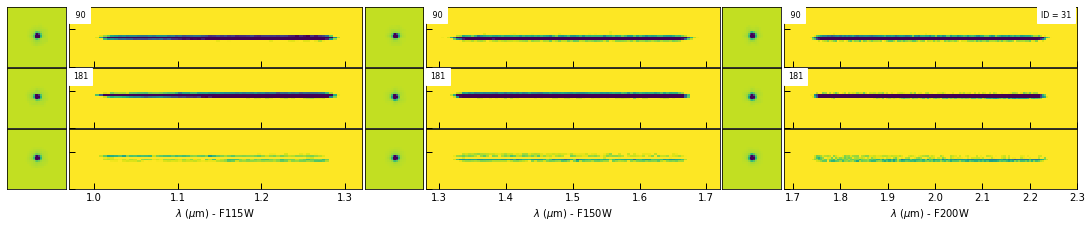

In [40]:
tfit = mb.template_at_z(templates=templ, fitter='lstsq')

fig_args = dict(mask_segmentation=True, average_only=False, scale_size=1, cmap='viridis_r')
_ = mb.drizzle_grisms_and_PAs(zfit=tfit, size=16, diff=True, fig_args=fig_args)

In [41]:
# Use internal tool to fit for vertical trace offsets (by grism / PA)
_tr = mb.fit_trace_shift(verbose=False)
print('Trace offset: ', _tr[0])

Trace offset:  [ 0.90285569 -1.06298214  0.72316312 -1.06949383  0.56137122 -1.39856202]


### Now it's a bit better, but still offset in trace direction

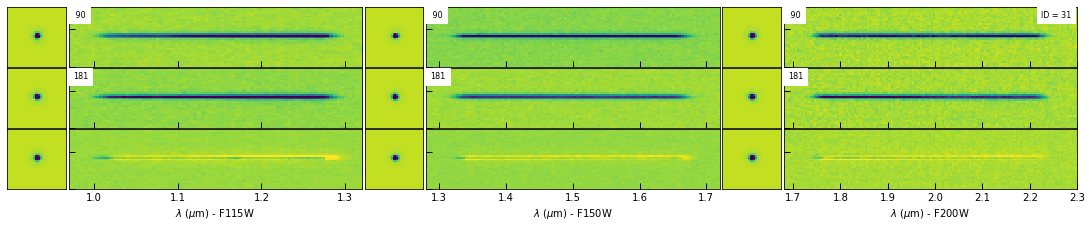

In [42]:
tfit = mb.template_at_z(templates=templ, fitter='lstsq')

fig_args = dict(mask_segmentation=True, average_only=False, scale_size=1, cmap='viridis_r')
_ = mb.drizzle_grisms_and_PAs(zfit=tfit, size=16, diff=True, fig_args=fig_args)

## 1D figure

Seems like MIRAGE is evaluating the spectra as flat-flambda at each grism, rather than interpolating across the full specified SED.

2020-10-05 16:05:16,015 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/grizli/fitting.py:3293: MatplotlibDeprecationWarning: The 'subsx' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axc.semilogx(subsx=[wmax])

2020-10-05 16:05:16,169 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/ipykernel_launcher.py:8: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  



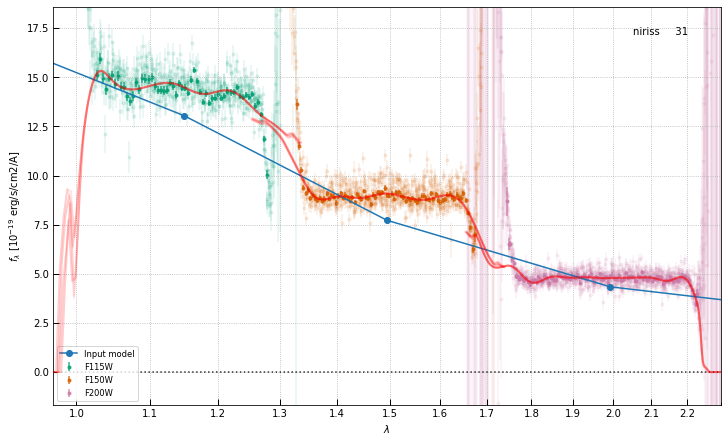

In [45]:
import h5py

_fig = mb.oned_figure(tfit=tfit, units='flam', apply_beam_mask=False, min_sens_show=0, figsize=[10, 6])

ax = _fig.axes[0]

# SED from catalog
h5 = h5py.File('source_sed_file_from_point_sources.hdf5')
data = h5['1'][()]
h5.close()

ax.plot(data[0], data[1]/1.e-19, marker='o', label='Input model')

ymax = data[1].max()/1.e-19
ax.set_ylim(-0.1*ymax, 1.1*ymax)
ax.legend(loc='lower left')

## Reinit for full grizli sim

In [46]:
beams = grp.get_beams(src_id, size=32, min_sens=0.001)
mb = multifit.MultiBeam(beams, group_name='niriss', fcontam=0., min_sens=0.0001, min_mask=0)

In [47]:
# Now replace the full simulation with the grizli model
ix = res.search(f'niriss_f115w')[0]
bp = res[ix+1]

# ETC calculation was flat f-lambda with AB=22 normalized at F115W
wave = np.linspace(0.3e4, 3e4, 512)
flam = wave*0.+1.e-18

# xtempl = eazy.templates.Template(arrays=(wave, flam))
# bp_flux = xtempl.integrate_filter(bp, flam=False)
# target_fnu = 10**(-0.4*(22-23.9))*1.e-29
# flam *= target_fnu / bp_flux

mb.compute_model(spectrum_1d=(wave, flam), is_cgs=True)

for beam in mb.beams:
    
    # No bad pixels
    msk = (beam.grism.data['ERR'] == 0) | (beam.grism.data['DQ'] > 0)
    beam.grism.data['ERR'][msk] = np.median(beam.grism.data['ERR'][~msk])
    beam.grism.data['DQ'][msk] = 0
    
    noise = np.random.normal(size=beam.sh)*beam.grism['ERR']
    beam.grism.data['SCI'] = (beam.beam.model + beam.contam + noise).astype(np.float32)
    #print(scale_frac, scale_noise)
    beam._parse_from_data(**beam._parse_params)

mb._parse_beam_arrays()
mb._parse_beams(psf=False)
mb.initialize_masked_arrays()

mb.write_master_fits()

  351 jwst_niriss_f115w v20160902163017 lambda_c= 1.1496e+04
niriss_00031.beams.fits


## Load saved "beams" file

In [49]:
from grizli import model, multifit, fitting, utils

In [85]:
mb = multifit.MultiBeam(f'niriss_{src_id:05d}.beams.fits', group_name='niriss', fcontam=0.2, min_sens=0.01)

load_master_fits: niriss_00031.beams.fits
1 NirissMirage_v1/jw00042001001_01101_00002_nis_elec.fits GR150R
2 NirissMirage_v1/jw00042001001_01101_00003_nis_elec.fits GR150R
3 NirissMirage_v1/jw00042001001_01101_00004_nis_elec.fits GR150R
4 NirissMirage_v1/jw00042001001_01101_00005_nis_elec.fits GR150R
5 NirissMirage_v1/jw00042001001_01101_00008_nis_elec.fits GR150C
6 NirissMirage_v1/jw00042001001_01101_00009_nis_elec.fits GR150C
7 NirissMirage_v1/jw00042001001_01101_00010_nis_elec.fits GR150C
8 NirissMirage_v1/jw00042001001_01101_00011_nis_elec.fits GR150C
9 NirissMirage_v1/jw00042001001_01101_00014_nis_elec.fits GR150R
10 NirissMirage_v1/jw00042001001_01101_00015_nis_elec.fits GR150R
11 NirissMirage_v1/jw00042001001_01101_00016_nis_elec.fits GR150R
12 NirissMirage_v1/jw00042001001_01101_00017_nis_elec.fits GR150R
13 NirissMirage_v1/jw00042001001_01101_00020_nis_elec.fits GR150C
14 NirissMirage_v1/jw00042001001_01101_00021_nis_elec.fits GR150C
15 NirissMirage_v1/jw00042001001_01101_0002

## Now the 2D fit is perfect, by construction

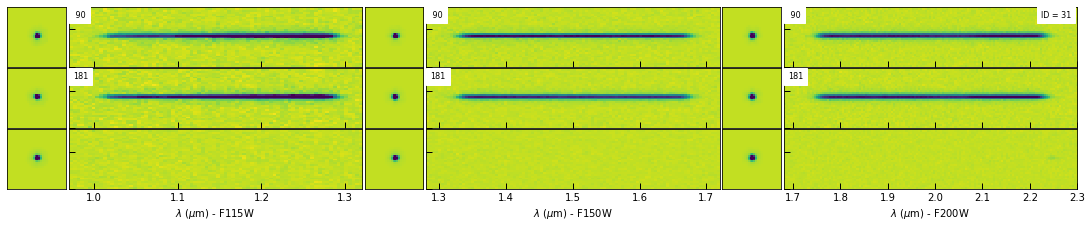

In [86]:
tfit = mb.template_at_z(templates=templ, fitter='lstsq')

fig_args = dict(mask_segmentation=True, average_only=False, scale_size=1, cmap='viridis_r')
_ = mb.drizzle_grisms_and_PAs(zfit=tfit, size=16, diff=True, fig_args=fig_args)

## Compare to ETC

Verify that the dispersed spectrum countrates are consistent with the output from the JWST ETC (v1.5.2).

**TBD:** compare MIRAGE backgrounds and pixel variances

f115w - psf_correction: 1.04
f150w - psf_correction: 1.05
f200w - psf_correction: 1.06


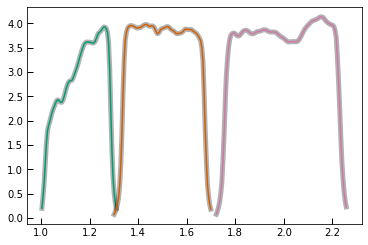

In [52]:
# Pandeia model

import pandeia.engine as etc
import pandeia.engine.jwst
import pandeia.engine.observation
import pandeia.engine.calc_utils
import pandeia.engine.etc3D
import pandeia.engine.strategy

import matplotlib.patheffects as path_effects
pe = [path_effects.withStroke(linewidth=5, foreground="k", alpha=0.3)]

det_config = {'readout_pattern': 'nis',
  'nexp': 8,
  'subarray': 'full',
  'nint': 1,
  'ngroup': 10}
              
strat_args = {'method': 'specapphot',
              'units': 'arcsec',
              'target_xy': [0.0, 0.0],
              'aperture_size': 2.,
              'background_subtraction': False,
              'reference_wavelength': 1.5}

det_signal = {}

for filt in ['f115w','f150w','f200w']:
    
    nis = etc.jwst.NIRISS(mode='wfss', 
                          config={'instrument':{'filter':filt, 
                                                'disperser':'gr150r',
                                                'order':1}})
    
    nis.detector['nexp'] = 8
    nis.detector['ngroup'] = 10
        
    src = etc.calc_utils.build_default_source()
    src['spectrum']['sed']['unit'] = 'flam'
    src['spectrum']['normalization']['norm_flux'] = 1.e-18
    src['spectrum']['normalization']['norm_fluxunit'] = 'flam'
    src['spectrum']['normalization']['norm_wave'] = 1.15
    src['spectrum']['normalization']['norm_waveunit'] = 'micron'
    
    strat = pandeia.engine.strategy.SpecApPhot(nis, **strat_args)

    obs = etc.observation.Observation(instrument=nis, strategy=strat)
    obs.background = 'minzodi' 
    obs.background_level = 'benchmark'

    obs.scene.sources[0].spectrum = src['spectrum']
    det = etc.etc3D.DetectorSignal(observation=obs)
    
    # Correction for PSF not normalized in det.flux_cube
    det.psf_corr = np.median(det.total_flux / det.flux_cube_list[0].sum(axis=0).sum(axis=0))
    print(f'{filt} - psf_correction: {det.psf_corr:.2f}')
    
    swave, srate, my_fp_pix_variance = det.slitless_rate(det.fp_rate, add_extended_background=False)
    x0 = det.fp_rate.shape[1]//2-1
    sh = swave.shape

    det.slitless_wave, det.slitless_rate_corr = swave, srate.sum(axis=0)[x0:x0+sh[0]]*det.psf_corr
    plt.plot(det.slitless_wave, det.slitless_rate_corr, color=utils.GRISM_COLORS[filt.upper()], path_effects=pe)

    det_signal[filt] = det
    


2020-10-05 16:08:20,702 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/grizli/fitting.py:3293: MatplotlibDeprecationWarning: The 'subsx' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axc.semilogx(subsx=[wmax])



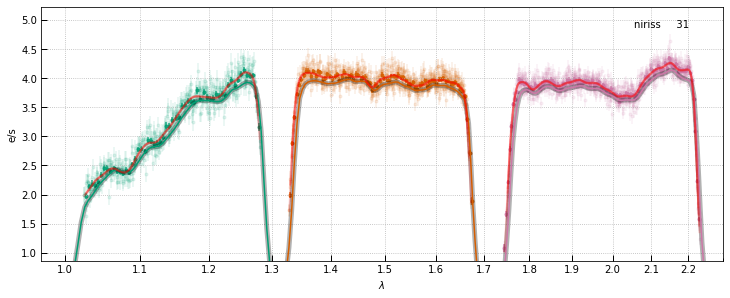

In [53]:
# Total efficiency

wum = wave/1.e4

_fig = mb.oned_figure(tfit=tfit, units='eps', figsize=[10, 4])
ax = _fig.axes[0]

for filt in det_signal:
    det = det_signal[filt]
    nis = det.instrument
    
    ote_int = nis.telescope.get_ote_eff(wum)
    coll_area = nis.telescope.coll_area
    a_lambda = coll_area * ote_int

    filter_eff = nis.get_filter_eff(wum)
    disperser_eff = nis.get_disperser_eff(wum)
    internal_eff = nis.get_internal_eff(wum)
    qe = nis.get_detector_qe(wum)

    my_total_eff = filter_eff*disperser_eff*internal_eff*qe

    total_eff = nis.get_total_eff(wum)*nis.telescope.coll_area

    # Flux mJy
    flux_mjy = 1.e-18*(wum*1.e4)**2/3.e18/1.e-26
    f_lambda = 1.5091905 * (flux_mjy / wum)
    my_ote_rate = a_lambda*f_lambda
    my_fp_rate = my_ote_rate * filter_eff * disperser_eff * internal_eff * qe

    dispersion = det.current_instrument.get_dispersion(wum)
    spec_rate_pix = my_fp_rate * dispersion

    q_yield, fano_factor = det.current_instrument.get_quantum_yield(wum)
    spec_electron_rate = spec_rate_pix*q_yield
    clip = spec_electron_rate > 1e-3
    
#     ax.plot(wum[clip], spec_electron_rate[clip], color=utils.GRISM_COLORS[filt.upper()],
#             path_effects=pe)
    
    # Slitless rate
    ax.plot(det.slitless_wave, det.slitless_rate_corr, color=utils.GRISM_COLORS[filt.upper()],
        path_effects=pe)
    

94


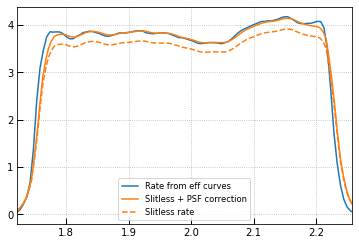

In [54]:
# Test electron rate from ETC
# Offset slightly from rates calculated directly with throughput curves because 
# the PSF model the ETC uses to create the "flux cube" appears to not be normalized


my_wave_pix, my_fp_pix_rate, my_fp_pix_variance = det.slitless_rate(
    det.fp_rate,
    add_extended_background=False
)

# my_wave_pix isn't same size as my_fp_pix_rate, so align based on max count
ix = np.argmax(my_fp_pix_rate.sum(axis=0))
iw = int(np.interp(wum[np.argmax(spec_electron_rate)], my_wave_pix, np.arange(len(my_wave_pix), dtype=int)))

print(iw)

sl = slice(ix - iw, ix - iw + len(my_wave_pix))
plt.plot(wum, spec_electron_rate, label='Rate from eff curves')

pl = plt.plot(my_wave_pix, my_fp_pix_rate.sum(axis=0)[sl]*det.psf_corr, label='Slitless + PSF correction')
plt.plot(my_wave_pix, my_fp_pix_rate.sum(axis=0)[sl], 
         color=pl[0].get_color(), linestyle='--', label='Slitless rate')

plt.xlim(my_wave_pix.min(), my_wave_pix.max())
plt.legend()
plt.grid()


In [55]:
# BG levels
for pupil in image_objects:
    for filt in image_objects[pupil]:
        for i, file in enumerate(image_objects[pupil][filt]):
            if filt != 'CLEAR':
                print(file.meta.filename, pupil, filt, file.meta.exposure.gsky001*1.66, 
                      file.meta.exposure.gsky001*0.8/0.065*1.66)

jw00042001001_01101_00002_nis_rate.fits F115W GR150R 0.9380367362499237 11.545067523075984
jw00042001001_01101_00003_nis_rate.fits F115W GR150R 0.9379611432552337 11.544137147756722
jw00042001001_01101_00004_nis_rate.fits F115W GR150R 0.9378888154029845 11.543246958805964
jw00042001001_01101_00005_nis_rate.fits F115W GR150R 0.9377343642711639 11.54134602179894
jw00042001001_01101_00008_nis_rate.fits F115W GR150C 0.9380781936645507 11.545577768179086
jw00042001001_01101_00009_nis_rate.fits F115W GR150C 0.9386855101585387 11.553052432720477
jw00042001001_01101_00010_nis_rate.fits F115W GR150C 0.9385118639469147 11.550915248577411
jw00042001001_01101_00011_nis_rate.fits F115W GR150C 0.9381931662559508 11.546992815457855
jw00042001001_01101_00014_nis_rate.fits F150W GR150R 0.751137113571167 9.244764474722054
jw00042001001_01101_00015_nis_rate.fits F150W GR150R 0.7505672472715378 9.237750735649696
jw00042001001_01101_00016_nis_rate.fits F150W GR150R 0.7506299775838852 9.238522801032435
jw00

2020-10-05 16:09:15,271 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/grizli/fitting.py:3293: MatplotlibDeprecationWarning: The 'subsx' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axc.semilogx(subsx=[wmax])



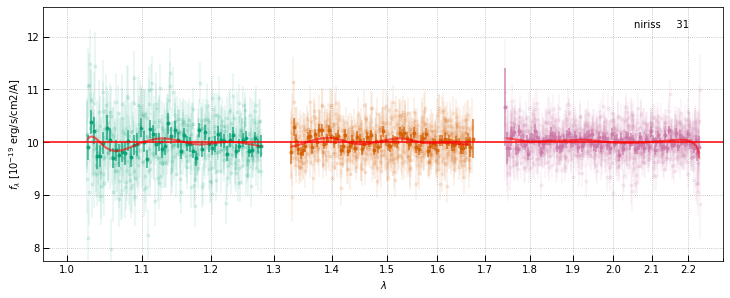

In [56]:
# Calibrated 1D spectrum should be simple flat model as input

_fig = mb.oned_figure(tfit=tfit, units='flam', figsize=[10, 4])
plt.plot(wum, flam/1.e-19, color='r')

# Simulate spectra with FSPS galaxy model

Generate simulated spectra based on redshifted FSPS models

In [91]:
import fsps
try:
    # Avoid reinitializing
    _ = sps
except:
    sps = fsps.StellarPopulation(zcontinuous=True)

In [92]:
# Galaxy templates and emission lines
gtempl = utils.load_templates(line_complexes=False, fwhm=800, fsps_templates=True, lorentz=False)

z: 2.0
tau: 0.30
tage: 0.5
logM: 5.0e+08


[]

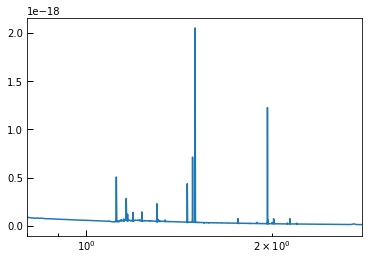

In [94]:
# Model + redshift
from astropy.cosmology import WMAP9
import astropy.units as u

if 1:
    # Blue
    sps.params['sfh'] = 4
    tau = 0.3
    sps.params['add_neb_emission'] = True
    sps.params['dust2'] = 0.
    logz = -0.5
    
    tage = 0.5
    
    stellar_mass = 5.e8
    z = 2.
    fsps_label = f'blue_sfg_z{z:.1f}'
    fsps_info = ''
else:
    # Red
    sps.params['sfh'] = 4
    tau = 0.05
    sps.params['add_neb_emission'] = True
    sps.params['dust2'] = 0.
    logz = 0

    tage = 1.5
    
    stellar_mass = 5.e10
    z = 2.4
    fsps_label = f'red_qg_z{z:.1f}'

sps.params['gas_logz'] = sps.params['logzsol'] = logz
sps.params['tau'] = tau

fsps_info = f'z: {z:.1f}\ntau: {tau:.2f}\ntage: {tage:.1f}\nlogM: {stellar_mass:.1e}'
print(fsps_info)

wave_rest, flam_rest = sps.get_spectrum(tage=tage, peraa=True)

dL = WMAP9.luminosity_distance(z).to(u.cm)

to_obs = (1*u.L_sun/(4*np.pi*dL**2)*stellar_mass / sps.stellar_mass).to(u.erg/u.second/u.cm**2)
flam = flam_rest/u.Angstrom*to_obs/(1+z)
wave = wave_rest*(1+z)
plt.plot(wave/1.e4, flam)
plt.xlim(0.8, 2.8)
#ymax = 
plt.semilogx()

In [95]:
# Read main object again
mb = multifit.MultiBeam(f'niriss_{src_id:05d}.beams.fits', group_name='niriss', fcontam=0.2, min_sens=0.001)

load_master_fits: niriss_00031.beams.fits
1 NirissMirage_v1/jw00042001001_01101_00002_nis_elec.fits GR150R
2 NirissMirage_v1/jw00042001001_01101_00003_nis_elec.fits GR150R
3 NirissMirage_v1/jw00042001001_01101_00004_nis_elec.fits GR150R
4 NirissMirage_v1/jw00042001001_01101_00005_nis_elec.fits GR150R
5 NirissMirage_v1/jw00042001001_01101_00008_nis_elec.fits GR150C
6 NirissMirage_v1/jw00042001001_01101_00009_nis_elec.fits GR150C
7 NirissMirage_v1/jw00042001001_01101_00010_nis_elec.fits GR150C
8 NirissMirage_v1/jw00042001001_01101_00011_nis_elec.fits GR150C
9 NirissMirage_v1/jw00042001001_01101_00014_nis_elec.fits GR150R
10 NirissMirage_v1/jw00042001001_01101_00015_nis_elec.fits GR150R
11 NirissMirage_v1/jw00042001001_01101_00016_nis_elec.fits GR150R
12 NirissMirage_v1/jw00042001001_01101_00017_nis_elec.fits GR150R
13 NirissMirage_v1/jw00042001001_01101_00020_nis_elec.fits GR150C
14 NirissMirage_v1/jw00042001001_01101_00021_nis_elec.fits GR150C
15 NirissMirage_v1/jw00042001001_01101_0002

In [96]:
mb.compute_model(spectrum_1d=(wave, flam), is_cgs=True)

for beam in mb.beams:
    
    # No bad pixels
    msk = (beam.grism.data['ERR'] == 0) | (beam.grism.data['DQ'] > 0)
    beam.grism.data['ERR'][msk] = np.median(beam.grism.data['ERR'][~msk])
    beam.grism.data['DQ'][msk] = 0
    
    noise = np.random.normal(size=beam.sh)*beam.grism['ERR']
    beam.grism.data['SCI'] = (beam.beam.model + beam.contam + noise).astype(np.float32)
    #print(scale_frac, scale_noise)
    beam._parse_from_data(**beam._parse_params)

mb._parse_beam_arrays()
mb._parse_beams(psf=False)
mb.initialize_masked_arrays()

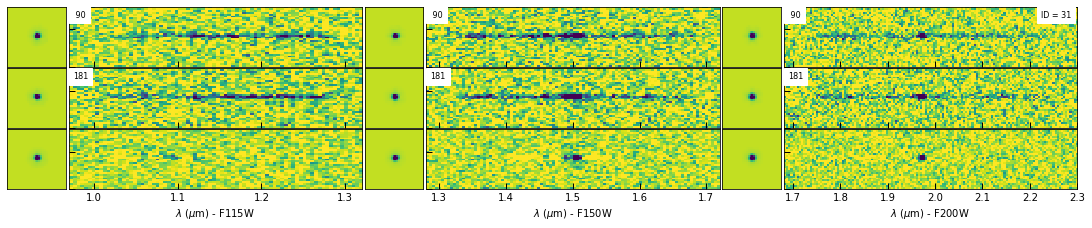

In [97]:
tfit = mb.template_at_z(templates=gtempl, fitter='lstsq')

_ = mb.drizzle_grisms_and_PAs(tfit=tfit, size=16, diff=True, fig_args=fig_args)
_[1].savefig(f'{fsps_label}_point_2D.png')


2020-10-05 16:28:25,003 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/grizli/fitting.py:3293: MatplotlibDeprecationWarning: The 'subsx' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axc.semilogx(subsx=[wmax])



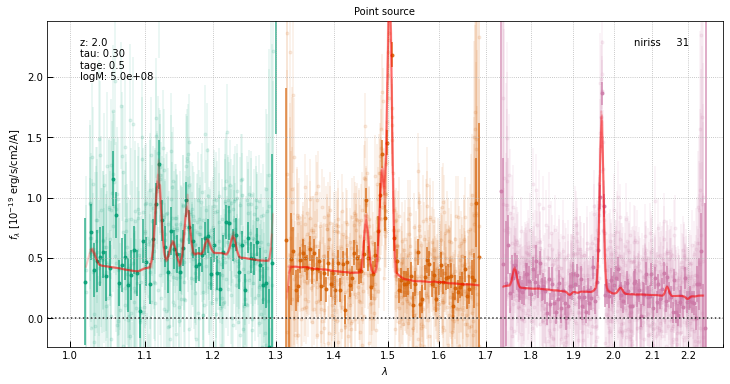

In [98]:
tfit = mb.template_at_z(z=z, templates=gtempl, fitter='bounded')

_fig = mb.oned_figure(tfit=tfit, figsize=[10, 5])
ax = _fig.axes[0]
ax.set_title('Point source')
ax.text(0.05, 0.95, fsps_info, ha='left', va='top', transform=ax.transAxes)

_fig.savefig(f'{fsps_label}_point.png')

#ax.plot(wave/1.e4, flam/1.e-19, color='pink')

In [99]:
fsps_lines = utils.GTable.read(os.path.join(os.getenv('SPS_HOME'), 'data/emlines_info.dat'), 
                   format='csv', names=['wave','name'])

line_trans = {'SII':['[SII]6717', '[SII]6732'],
              'Ha':['H alpha 6563'], 
              'OIII': ['[OIII]5007', '[OIII]4960'], 
              'Hb':['H beta 4861'],
              'NeIII-3867':['[NeIII]3870'],
              'OII':['[OII]3726', '[OII]3729']}

In [100]:
print('=== Emission line fluxes (x 1e-17 erg/s/cm2) ===')
for l in line_trans:
    cfit = np.array(tfit['cfit']['line '+l])/1.e-17
    
    fsps_flux = 0.
    for tr in line_trans[l]:        
        dlam = sps.emline_wavelengths - fsps_lines['wave'][np.where(fsps_lines['name'] == tr)[0][0]]
        fsps_lum = sps.emline_luminosity[np.argmin(np.abs(dlam))]
        fsps_flux += fsps_lum*to_obs
        
    print(f'{l:12} - template fit: {cfit[0]:9.3f} ± {cfit[1]:6.3f}  FSPS {fsps_flux.value/1.e-17:9.3f}')    

=== Emission line fluxes (x 1e-17 erg/s/cm2) ===
SII          - template fit:     0.069 ±  0.098  FSPS     0.126
Ha           - template fit:     1.806 ±  0.089  FSPS     1.647
OIII         - template fit:     3.725 ±  0.114  FSPS     3.681
Hb           - template fit:     0.569 ±  0.091  FSPS     0.567
NeIII-3867   - template fit:     0.450 ±  0.150  FSPS     0.308
OII          - template fit:     0.847 ±  0.150  FSPS     0.825


# Extended Sersic source

The fit above was generated for a point source model, so will have optimal S/N.  Now make a more realistic galaxy `astropy.modeling.models.Sersic2D` profile.


In [68]:
# Get PSF cutout from mosaic

# !! Just doing F115W here, would have to do for each filter separately

import astropy.wcs as pywcs

mos = pyfits.open('niriss-f115w_drz_sci.fits')
wcs = pywcs.WCS(mos[0].header)

ix = np.where(grp.catalog['id'] == mb.id)[0][0]

xi, yi = grp.catalog['xpeak'][ix], grp.catalog['ypeak'][ix]

si = 64
slx = slice(xi-si, xi+si)
sly = slice(yi-si, yi+si)

_head = utils.get_wcs_slice_header(wcs, slx, sly)
_head['PHOTFLAM'] = mos[0].header['PHOTFLAM']
_head['PHOTPLAM'] = mos[0].header['PHOTPLAM']
_head['FILTER'] = mos[0].header['FILTER']
_head['PUPIL'] = mos[0].header['PUPIL']

_psf = mos[0].data[sly, slx]*1

yp, xp = np.indices(_psf.shape)

mos.close()

#mb.replace_direct_image_cutouts?

2020-10-05 16:11:20,747 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.FileIO name='niriss-f115w_drz_sci.fits' mode='rb' closefd=True>
  import sys



In [70]:
# Sersic source
from astropy.modeling.models import Sersic2D
import scipy.signal

# Careful, because astropy Sersic r_e very different than GALFIT r_e depending on n
sers = Sersic2D(r_eff=1.5, n=1, x_0=si-1, y_0=si-1)
sers_im = sers(xp, yp)
sers_im /= sers_im.sum()

# Convolve with PSF stamp
_conv = scipy.signal.fftconvolve(sers_im, _psf, mode='same')

#############
# Update Segmentation image
err_thresh = utils.nmad(_psf)
_seg = pyfits.ImageHDU(data=(_conv > 3*err_thresh)*mb.id, header=_head)
mb.replace_segmentation_image_cutouts(ref_image=_seg)

###############
# This function puts the convolved stamp in the frame of the different dithered exposures
_hdu = pyfits.ImageHDU(data=_conv, header=_head)
mb.replace_direct_image_cutouts(ref_image=_hdu, background_func=None)

#mb.group_name = 'sersic'
#mb.write_master_fits()

Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Using default C-based coordinat

In [71]:
# Recompute spectra with new morphology

mb.compute_model(spectrum_1d=(wave, flam), is_cgs=True)

for beam in mb.beams:
    
    # No bad pixels
    msk = (beam.grism.data['ERR'] == 0) | (beam.grism.data['DQ'] > 0)
    beam.grism.data['ERR'][msk] = np.median(beam.grism.data['ERR'][~msk])
    beam.grism.data['DQ'][msk] = 0
    
    noise = np.random.normal(size=beam.sh)*beam.grism['ERR']
    beam.grism.data['SCI'] = (beam.beam.model + beam.contam + noise).astype(np.float32)
    #print(scale_frac, scale_noise)
    beam._parse_from_data(**beam._parse_params)

#mb._update_beam_mask()
mb._parse_beam_arrays()
mb._parse_beams(psf=False)
mb.initialize_masked_arrays()


2020-10-05 16:30:25,301 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/mirage/lib/python3.6/site-packages/grizli/fitting.py:3293: MatplotlibDeprecationWarning: The 'subsx' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axc.semilogx(subsx=[wmax])



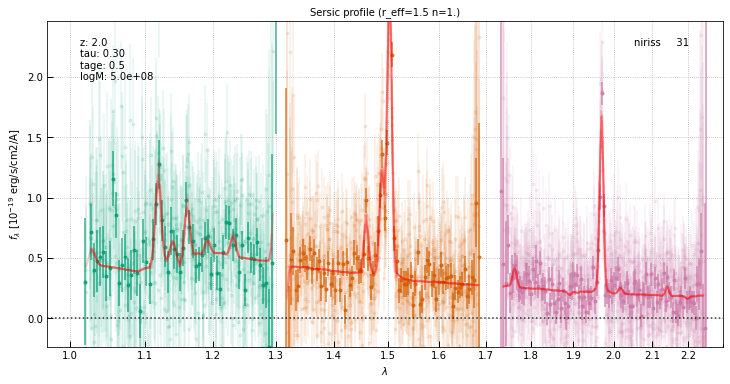

In [103]:
tfit = mb.template_at_z(z=z, templates=gtempl, fitter='bounded')

_fig = mb.oned_figure(tfit=tfit, figsize=[10, 5])
ax = _fig.axes[0]
ax.set_title('Sersic profile ({0})'.format(' '.join(sers.__repr__().split(', ')[1:3])))

ax.text(0.05, 0.95, fsps_info, ha='left', va='top', transform=ax.transAxes)

_fig.savefig(f'{fsps_label}_sersic.png')


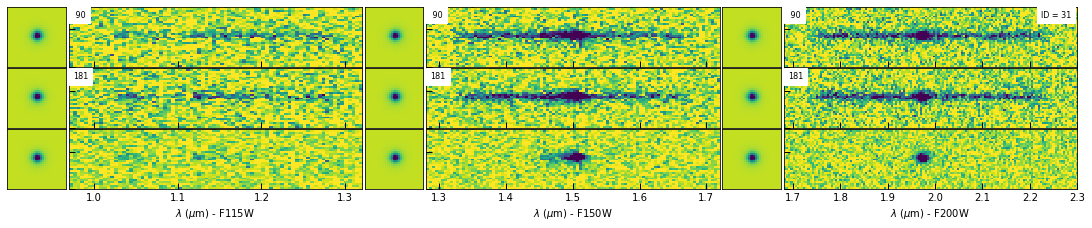

In [80]:
_ = mb.drizzle_grisms_and_PAs(zfit=tfit, size=16, diff=True, fig_args=fig_args)
_[1].savefig(f'{fsps_label}_sersic_2D.png')


In [101]:
print('=== Emission line fluxes (x 1e-17 erg/s/cm2) ===')
for l in line_trans:
    cfit = np.array(tfit['cfit']['line '+l])/1.e-17
    
    fsps_flux = 0.
    for tr in line_trans[l]:        
        dlam = sps.emline_wavelengths - fsps_lines['wave'][np.where(fsps_lines['name'] == tr)[0][0]]
        fsps_lum = sps.emline_luminosity[np.argmin(np.abs(dlam))]
        fsps_flux += fsps_lum*to_obs
        
    print(f'{l:12} - template fit: {cfit[0]:9.3f} ± {cfit[1]:6.3f}  FSPS {fsps_flux.value/1.e-17:9.3f}')

=== Emission line fluxes (x 1e-17 erg/s/cm2) ===
SII          - template fit:     0.069 ±  0.098  FSPS     0.126
Ha           - template fit:     1.806 ±  0.089  FSPS     1.647
OIII         - template fit:     3.725 ±  0.114  FSPS     3.681
Hb           - template fit:     0.569 ±  0.091  FSPS     0.567
NeIII-3867   - template fit:     0.450 ±  0.150  FSPS     0.308
OII          - template fit:     0.847 ±  0.150  FSPS     0.825


In [120]:
l = 'Ha'
cfit = np.array(tfit['cfit']['line '+l])/1.e-17
cfit[0]/cfit[1]

20.366429583117114

Drizzle line -> Ha   (1.70 0.05)
Drizzle line -> OIII (3.69 0.10)
Drizzle line -> Hb   (0.60 0.09)
Drizzle line -> OII  (1.06 0.33)


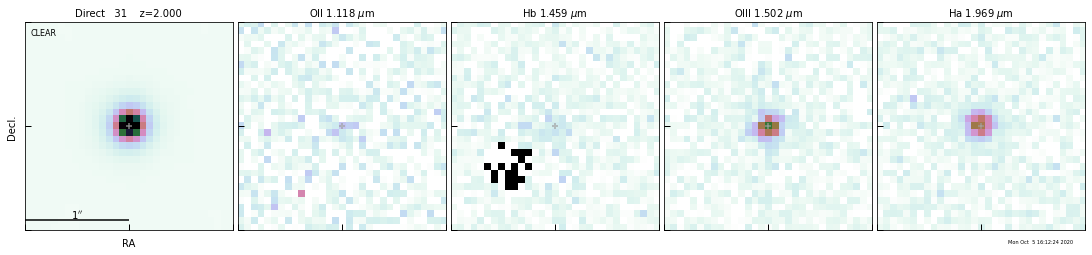

In [76]:
pline = {'kernel': 'point', 'pixfrac': 0.2, 'pixscale': 0.065, 'size': 4, 'wcs': None}
line_hdu = mb.drizzle_fit_lines(tfit, pline, save_fits=False, get_ir_psfs=False)

s = 1
_fig = fitting.show_drizzled_lines(line_hdu, direct_filter=['F115W'], size_arcsec=1, 
                            scale=s, dscale=s/16)
_fig.savefig(f'{fsps_label}_sersic_line.png')
